1. First create S3 bucket on AWS account 
2. In the bucket upload files 
3. and make these files publicaly where you can access it  

In [1]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType

from pyspark.sql.functions import *
from pyspark.sql.window import Window
from pyspark.sql.functions import year, month, dayofmonth, when
from pyspark.sql.functions import lower, regexp_replace

In [2]:
# For importing manually sprksession
from pyspark.sql import SparkSession

# creating session
spark = SparkSession.builder.appName("IPL Data Analysis").getOrCreate()     # getOrCreate = if the app already exist then get it and if we have not then create the app

Py4JJavaError: An error occurred while calling None.org.apache.spark.api.java.JavaSparkContext.
: java.net.BindException: Cannot assign requested address: bind: Service 'sparkDriver' failed after 16 retries (on a random free port)! Consider explicitly setting the appropriate binding address for the service 'sparkDriver' (for example spark.driver.bindAddress for SparkDriver) to the correct binding address.
	at java.base/sun.nio.ch.Net.bind0(Native Method)
	at java.base/sun.nio.ch.Net.bind(Net.java:556)
	at java.base/sun.nio.ch.ServerSocketChannelImpl.netBind(ServerSocketChannelImpl.java:344)
	at java.base/sun.nio.ch.ServerSocketChannelImpl.bind(ServerSocketChannelImpl.java:301)
	at io.netty.channel.socket.nio.NioServerSocketChannel.doBind(NioServerSocketChannel.java:141)
	at io.netty.channel.AbstractChannel$AbstractUnsafe.bind(AbstractChannel.java:562)
	at io.netty.channel.DefaultChannelPipeline$HeadContext.bind(DefaultChannelPipeline.java:1334)
	at io.netty.channel.AbstractChannelHandlerContext.invokeBind(AbstractChannelHandlerContext.java:600)
	at io.netty.channel.AbstractChannelHandlerContext.bind(AbstractChannelHandlerContext.java:579)
	at io.netty.channel.DefaultChannelPipeline.bind(DefaultChannelPipeline.java:973)
	at io.netty.channel.AbstractChannel.bind(AbstractChannel.java:260)
	at io.netty.bootstrap.AbstractBootstrap$2.run(AbstractBootstrap.java:356)
	at io.netty.util.concurrent.AbstractEventExecutor.runTask(AbstractEventExecutor.java:174)
	at io.netty.util.concurrent.AbstractEventExecutor.safeExecute(AbstractEventExecutor.java:167)
	at io.netty.util.concurrent.SingleThreadEventExecutor.runAllTasks(SingleThreadEventExecutor.java:470)
	at io.netty.channel.nio.NioEventLoop.run(NioEventLoop.java:569)
	at io.netty.util.concurrent.SingleThreadEventExecutor$4.run(SingleThreadEventExecutor.java:997)
	at io.netty.util.internal.ThreadExecutorMap$2.run(ThreadExecutorMap.java:74)
	at io.netty.util.concurrent.FastThreadLocalRunnable.run(FastThreadLocalRunnable.java:30)
	at java.base/java.lang.Thread.run(Thread.java:1623)


In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:

ball_by_ball_df = spark.read.schema(ball_by_ball_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")
        # load the csv file from S3

.option("header","true") = first row treat as column, without this treat as normal data           
.option("inferSchema","true") = decode data types of each column                                                        
.load(): This loads the data from the specified file path 


In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),  # PySpark does not have a 'YearType', so IntegerType is used.
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

match_df = spark.read.schema(match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project01/Match.csv")

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

player_df = spark.read.schema(player_schema).format("csv").option("header","true").option('inferschema','true').load("s3://ipl-data-analysis-project01/Player.csv")


In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 2), True),  # Adjust precision and scale as per your needs
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),  # No YearType in PySpark, so IntegerType is used.
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])

player_match_df = spark.read.schema(player_match_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project01/Player_match.csv")


In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

team_df = spark.read.schema(team_schema).format("csv").option("header","true").load("s3://ipl-data-analysis-project01/Team.csv")

In [0]:
# Filter to include only valid deliveries (excluding extras like wides and no balls for specific analyses)
ball_by_ball_df = ball_by_ball_df.filter((col("wides") == 0) & (col("noballs") == 0)) 

# Aggregations : Calculate the total and average runs scored in each match and innings
total_and_avg_runs = ball_by_ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)

In [0]:
# Window Functions : Calculate running total of runs ineach match for each over
windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")

ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

window.partitionBy("match_id", "innings_no") = Splits the data in two category           
withColumn = creates new column                                                          


In [0]:
#Comditional Column = Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df = ball_by_ball_df.withColumn(
  "high_impact",
 when((col('runs_scored') + col('extra_runs') > 6) | (col('bowler_wicket') == True),True).otherwise(False)
)

In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+---+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NO

Match

In [0]:
from pyspark.sql.functions import year, month, dayofmonth, when

#Extracting year, month, and day from match date for more detailed time-based analysis
match_df = match_df.withColumn("year", year("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("day", dayofmonth("match_date"))

#High margin win: categorized win margins into 'high', 'medium', 'low'
match_df = match_df.withColumn(
    'win_margin_category',
    when(col('win_margin') >= 100, 'High')
    .when((col('win_margin') >= 50) & (col('win_margin') < 100), 'Medium')
    .otherwise('Low')
)

# Analyze the impact of the toss: who wins the toss and the match
match_df = match_df.withColumn(
    'toss_match_winner',
    when(col('toss_winner') == col('match_winner'), "Yes").otherwise('No')
)

# Show the enhanced match Dataframe
match_df.show()

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|    manofmach|win_margin|country_id|year|month| day|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-------------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|  

Player

In [0]:
from pyspark.sql.functions import lower, regexp_replace

# Normalize and clean player names
player_df = player_df.withColumn(
    'player_name',
    lower(regexp_replace(col('player_name'), '[^a-zA-Z0-9]', ''))
) 


#Handle missing values in 'batting_hand' and 'bowling_skill' with deafult 'unknown'
player_df = player_df.na.fill({'batting_hand':'unknown','bowling_skill':'unknown'}) 


# Categorizing players based on batting hand
player_df = player_df.withColumn(
    'batting_style',
    when(col('batting_hand').contains('left'),'Left-handed').otherwise("Right-handed")
)

player_df.show(2)

+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|player_sk|player_id|player_name| dob|  batting_hand|   bowling_skill|country_name|batting_style|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
|        0|        1|  scganguly|null| Left-hand bat|Right-arm medium|       India| Right-handed|
|        1|        2| bbmccullum|null|Right-hand bat|Right-arm medium| New Zealand| Right-handed|
+---------+---------+-----------+----+--------------+----------------+------------+-------------+
only showing top 2 rows



lower(): Converts all characters in the player_name column to lowercase                                     
regexp_replace(): Replaces characters in the column based on a regular expression pattern                   
[^a-zA-Z0-9]: This pattern matches any character that is not a letter (a-z, A-Z) or a digit (0-9)

Player-Match

In [0]:
from pyspark.sql.functions import col, when, current_date, expr

player_match_df = player_match_df.withColumn(
    'veteran_status',
    when(col('age_as_on_match') >= 35, 'Veteran').otherwise('Non-Veteran')
)


#Filter to incluce only players who played the match (excluding bench players)
# -- player_match_df = player_match_df.filter(col('batting_status') != 'Did Not Bat')


#Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    'years_since_debut',
    (year(current_date()) - col('season_year'))     # current_date() = it is an function give current date
)

player_match_df.show(2)

+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|     bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-----------

In [0]:
ball_by_ball_df.createOrReplaceTempView('ball_by_ball')
match_df.createOrReplaceTempView('match')
player_df.createOrReplaceTempView('player')
player_match_df.createOrReplaceTempView('player_match')
team_df.createOrReplaceTempView('team')

In [0]:
# Show the player name and their season year where he scored top score

top_scoring_batsman_per_season = spark.sql("""
                                           
SELECT
p.player_name, 
m.season_year,
SUM(b.runs_scored) AS total_runs
FROM ball_by_ball b
JOIN match m ON b.match_id =  m.match_id
JOIN player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON p.player_id = pm.player_id
GROUP BY p.player_name, m.season_year
ORDER BY m.season_year, total_runs DESC
                                           
""")

top_scoring_batsman_per_season.show(20)

+------------+-----------+----------+
| player_name|season_year|total_runs|
+------------+-----------+----------+
|     semarsh|       2008|       614|
|    ggambhir|       2008|       532|
|stjayasuriya|       2008|       508|
|    srwatson|       2008|       463|
|     gcsmith|       2008|       437|
| acgilchrist|       2008|       431|
|    ykpathan|       2008|       430|
|     skraina|       2008|       420|
|     msdhoni|       2008|       414|
|     vsehwag|       2008|       399|
|    rgsharma|       2008|       399|
|     rdravid|       2008|       370|
|   scganguly|       2008|       349|
|     sdhawan|       2008|       340|
|kcsangakkara|       2008|       319|
|    djhussey|       2008|       318|
|   rvuthappa|       2008|       316|
|  saasnodkar|       2008|       311|
| yuvrajsingh|       2008|       299|
|     papatel|       2008|       297|
+------------+-----------+----------+
only showing top 20 rows



In [0]:
# Show the bowler name where he economic in powerplay

economical_bowlers_powerplay = spark.sql("""
                                         
SELECT
p.player_name, 
AVG(b.runs_scored) AS avg_runs_per_ball,
COUNT(b.bowler_wicket) AS total_wickets
FROM ball_by_ball b 
JOIN player_match pm ON b.match_id = pm.match_id AND b.bowler = pm.player_id
JOIN player p ON pm.player_id = p.player_id
WHERE b.over_id <= 6
GROUP BY p.player_name
HAVING COUNT(*) > 120
ORDER BY avg_runs_per_ball, total_wickets DESC

""")

economical_bowlers_powerplay.show(10)

+--------------+------------------+-------------+
|   player_name| avg_runs_per_ball|total_wickets|
+--------------+------------------+-------------+
|smsmsenanayake|0.8492063492063492|          126|
|      spnarine| 0.929718875502008|          498|
|     gdmcgrath|0.9324324324324325|          222|
|     slmalinga|0.9407630522088354|          996|
|  sohailtanvir| 0.946969696969697|          132|
|     achandila|0.9513888888888888|          144|
|      dpnannes|0.9532163742690059|          342|
|        bkumar|0.9561487130600572|         1049|
|  bwhilfenhaus|            0.9625|          240|
|      rrampaul|0.9629629629629629|          162|
+--------------+------------------+-------------+
only showing top 10 rows



In [0]:
# Impact of Winning the toss in individual matches

toss_impact_individual_matches = spark.sql("""
                                           
SELECT 
m.match_id,
m.toss_winner,
m.toss_name,
m.match_winner,
    CASE WHEN m.toss_winner = m.match_winner THEN 'WON' ELSE 'LOSS' END AS match_outcome  
FROM match m
WHERE m.toss_name IS NOT NULL
ORDER BY m.match_id
                                           
""")

toss_impact_individual_matches.show(20)

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         LOSS|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          WON|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         LOSS|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         LOSS|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         LOSS|
|  335992|     Kings XI Punjab|      bat|    Rajasthan Royals|         LOSS|
|  335993|     Deccan Chargers|      bat|    Delhi Daredevils|         LOSS|
|  335994|      Mumbai Indians|    field| Chennai Super Kings|         LOSS|
|  335995|    Rajasthan Royals|    field|    Rajasthan Royals|          WON|
|  335996|      Mumbai Indians|    field|     Kings XI Punjab|         LOSS|

In [0]:
average_runs_in_wins = spark.sql("""
                                 
SELECT 
p.player_name, 
AVG(b.runs_scored) AS avg_runs_in_wins,
COUNT(*) AS innings_played
FROM ball_by_ball b
JOIN player_match pm ON b.match_id = pm.match_id AND b.striker = pm.player_id
JOIN player p ON pm.player_id = p.player_id
JOIN match m ON pm.match_id = m.match_id
WHERE m.match_winner = pm.player_team
GROUP BY p.player_name
ORDER BY avg_runs_in_wins DESC
                  
""")

average_runs_in_wins.show(10)

+------------+------------------+--------------+
| player_name|  avg_runs_in_wins|innings_played|
+------------+------------------+--------------+
|  rashidkhan|               6.0|             1|
|shahidafridi|3.3333333333333335|             6|
|     anahmed|               3.0|             3|
|     babhatt|               3.0|             2|
|      snkhan|2.5789473684210527|            19|
|   spjackson|               2.4|             5|
|harmeetsingh|2.3333333333333335|             6|
|     umargul|2.3076923076923075|            13|
|   smpollock|               2.2|            15|
|      msgony|2.1379310344827585|            29|
+------------+------------------+--------------+
only showing top 10 rows



In [0]:
import matplotlib.pyplot as plt

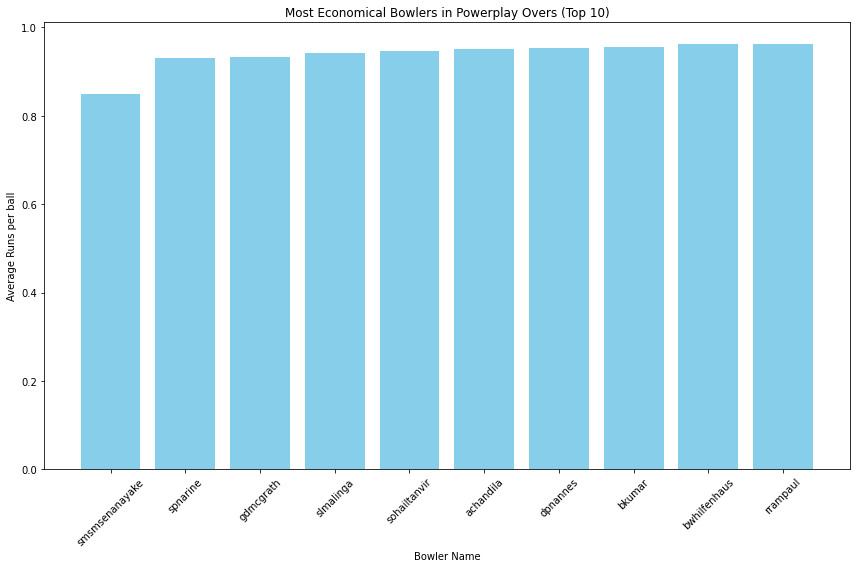

In [0]:
# Assuming 'economical_powerplay' is already executed and available as a Saprk DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visulazing using matplotlib
plt.figure(figsize=(12,8))

# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per ball') 
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:

import seaborn as sns

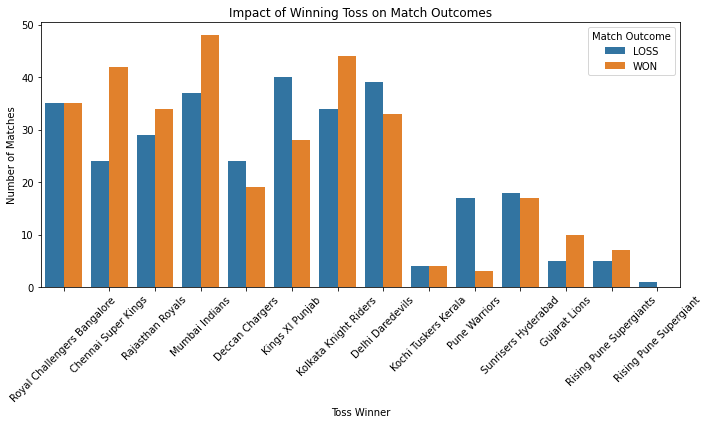

In [0]:

toss_impact_pd = toss_impact_individual_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

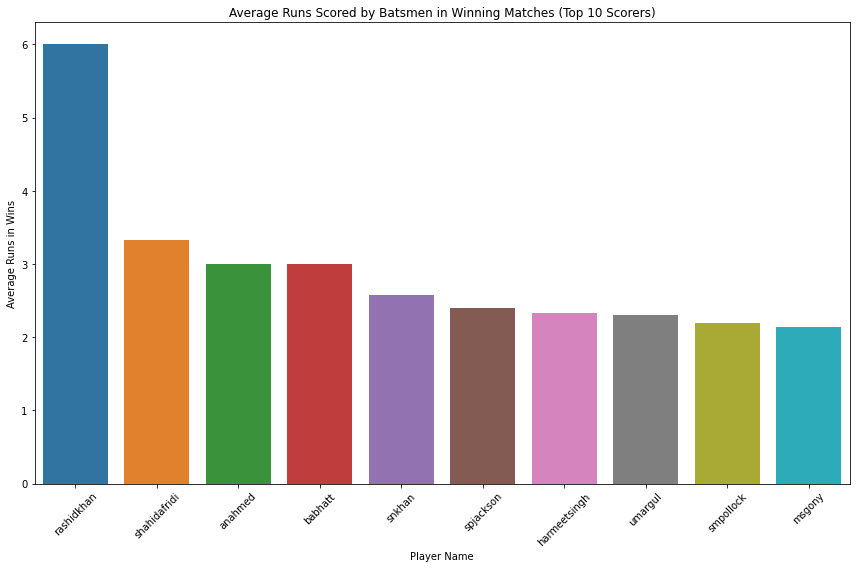

In [0]:

average_runs_pd = average_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
